# Sparse and Non Negative Shallow Auto Encoder without AMD
* Sparsity Regularizer : KL Divergence (KLdivSum), applied to the activation.
* Non-Negativity Regularizer : Asymetric Weight Decay, applied to the weights of the decoder:
    * Positive weights decay: 0
    * Negative weights decay: 1
    * Decay weight: 1
* Number of epochs for training: 500 epochs
* Activation of the encoder: Sigmoid
* Activation of the decoder: LeakyRELU (useless in case of Non-Negativity)
## Impact of the value of the sparsity parameters
* Sparsity objective: 0.01, 0.05, 0.1, 0.2
* Sparsity weight: 0.001, 0.005, 0.01, 0.05, 0.1, 0.5



In [15]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from sparseShallowAE import SparseShallowAE_KL, SparseShallowAE_L1, SparseShallowAE_KL_sum
from nonNegSparseShallowAE import Sparse_NonNeg_ShallowAE_KLsum_AsymDecay
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

'2.2.0'

In [16]:
FILE_PATH = "../"
x_small, _ = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
x_small = x_small[:10]
print('x_small shape:', x_small.shape)

x_small shape: (10, 28, 28, 1)


In [17]:
results = pd.read_csv("../Results/ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_16results")
results

,Unnamed: 0,sparsity_objective,sparsity_weight,test_error,test_kl_loss,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_kl_loss,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,0.01,0.0001,0.013995,0.001373,0.740328,0.773161,0.508144,0.013929,0.001372,0.738887,0.771413,0.507848
1,1,0.05,0.0001,0.012784,0.001063,0.965728,1.005626,0.358587,0.012714,0.001062,0.965325,1.004499,0.358173
2,2,0.10,0.0001,0.010865,0.000789,1.454399,1.506467,0.247599,0.010785,0.000787,1.452539,1.503833,0.247854
3,3,0.20,0.0001,0.009537,0.000301,1.983552,2.027234,0.192018,0.009480,0.000300,1.982091,2.025077,0.192294
4,4,0.01,0.0005,0.017139,0.002782,0.226924,0.250970,0.612789,0.017011,0.002776,0.226714,0.250372,0.611881
5,5,0.05,0.0005,0.014762,0.001777,0.362860,0.382913,0.450945,0.014630,0.001774,0.362539,0.382307,0.450875
6,6,0.10,0.0005,0.012358,0.001013,0.674654,0.702294,0.338118,0.012233,0.001008,0.673988,0.701248,0.338363
7,7,0.20,0.0005,0.010030,0.000302,1.379006,1.414386,0.235677,0.009947,0.000297,1.376391,1.411664,0.236134
8,8,0.01,0.0010,0.021515,0.003408,0.143312,0.117549,0.671704,0.021395,0.003400,0.142847,0.117068,0.670450
9,9,0.05,0.0010,0.016161,0.001843,0.198703,0.212357,0.496107,0.015961,0.001836,0.198273,0.211908,0.495802


In [18]:
max_values = results.max(axis=0)
max_idx = results.idxmax()
min_values = results.min(axis=0)
min_idx = results.idxmin()
median_values = results.median()
std_values = results.std()
sparsity_objectives = results['sparsity_objective']
sparsity_weights = results['sparsity_weight']

In [8]:

print('***********************Maximum values**********************')
print(max_values[1:])
print('\n')
print('***********************Minimum values**********************')
print(min_values[1:])
print('\n')
print('***********************Median values**********************')
print(median_values[1:])


***********************Maximum values**********************
sparsity_objective                                 0.200000
sparsity_weight                                    0.500000
test_error                                         0.086644
test_kl_loss                                       0.054227
test_max_approx_error_toOriginal_dilatation        1.983552
test_max_approx_error_toRec_dilatation             2.027234
test_sparsity                                      0.781555
training_error                                     0.087013
training_kl_loss                                   0.054309
training_max_approx_error_toOriginal_dilatation    1.982091
training_max_approx_error_toRec_dilatation         2.025077
training_sparsity                                  0.778721
dtype: float64


***********************Minimum values**********************
sparsity_objective                                 0.010000
sparsity_weight                                    0.000100
test_error             

In [9]:
print('\033[1m'+'Lowest error: '+'\033[0m' , round(min_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_error']], ', sparsity_weight=', sparsity_weights[min_idx['test_error']], '\n')
print('\033[1m'+'Highest error: '+'\033[0m', round(max_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_error']], ', sparsity_weight=', sparsity_weights[max_idx['test_error']], '\n')
print('\033[1m'+'Least sparse: '+'\033[0m' , round(min_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[min_idx['test_sparsity']], '\n')
print('\033[1m'+'Most sparse: '+'\033[0m', round(max_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[max_idx['test_sparsity']], '\n')
print('\033[1m'+'Lowest Max-approximation error to dilatation of the originals: '+'\033[0m' , round(min_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Highest  Max-approximation error to dilatation of the originals: '+'\033[0m', round(max_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Lowest KL-loss: '+'\033[0m' , round(min_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[min_idx['test_kl_loss']], '\n')
print('\033[1m'+'Highest KL-loss: '+'\033[0m', round(max_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[max_idx['test_kl_loss']], '\n')
print('\033[1m'+'Lowest max-approximation error to dilatation of the reconstruction: '+'\033[0m' , round(min_values['test_max_approx_error_toRec_dilatation'], 5), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toRec_dilatation']], '\n')
print('\033[1m'+'Highest max-approximation error to dilatation of the reconstruction: '+'\033[0m', round(max_values['test_max_approx_error_toRec_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toRec_dilatation']], '\n')


Lowest error:  0.0095 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 

Highest error:  0.0866 , sparsity_objective= 0.01 , sparsity_weight= 0.5 

Least sparse:  0.0025 , sparsity_objective= 0.05 , sparsity_weight= 0.5 

Most sparse:  0.7816 , sparsity_objective= 0.01 , sparsity_weight= 0.01 

Lowest Max-approximation error to dilatation of the originals:  0.034 , sparsity_objective= 0.01 , sparsity_weight= 0.005 

Highest  Max-approximation error to dilatation of the originals:  1.9836 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 

Lowest KL-loss:  0.0002 , sparsity_objective= 0.2 , sparsity_weight= 0.001 

Highest KL-loss:  0.0542 , sparsity_objective= 0.2 , sparsity_weight= 0.5 

Lowest max-approximation error to dilatation of the reconstruction:  3e-05 , sparsity_objective= 0.01 , sparsity_weight= 0.1 

Highest max-approximation error to dilatation of the reconstruction:  2.0272 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 



Nb:
* Lowest error reached with weakest sparsity constraints.
* Highest error reached with strongest sparsity constraints.
* The lowest sparsity measuer is not significant, as if all coefficients are very close to zero but are similar, then the sparsity measure from Hoyer 2004 is close to 0.
* Highest max-approximation error to dilatation of the originals and of the reconstruction reached with the weakest sparsity constraint.

In [19]:
sparsity_objectives = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_16_sparsityObjectives_dim100.npy')
sparsity_weights = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_16_sparsityWeights_dim100.npy')
test_mse = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_16_test_errors_dim100.npy')
train_mse = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_16_training_errors_dim100.npy')
test_kl_loss = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_16_test_kl_loss_dim100.npy')
train_kl_loss = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_16_training_kl_loss_dim100.npy')
test_max_approx_to_Original = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_16_test_max_approx_error_toOriginal_dilation_dim100.npy')
train_max_approx_to_Original = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_16_training_max_approx_error_toOriginal_dilatation_dim100.npy')
test_max_approx_to_Rec = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_16_test_max_approx_error_toRec_dilation_dim100.npy')
train_max_approx_to_Rec = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_16_training_max_approx_error_toRec_dilatation_dim100.npy')
test_sparsity = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_16_test_sparsity_dim100.npy')
train_sparsity = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_16_training_sparsity_dim100.npy')

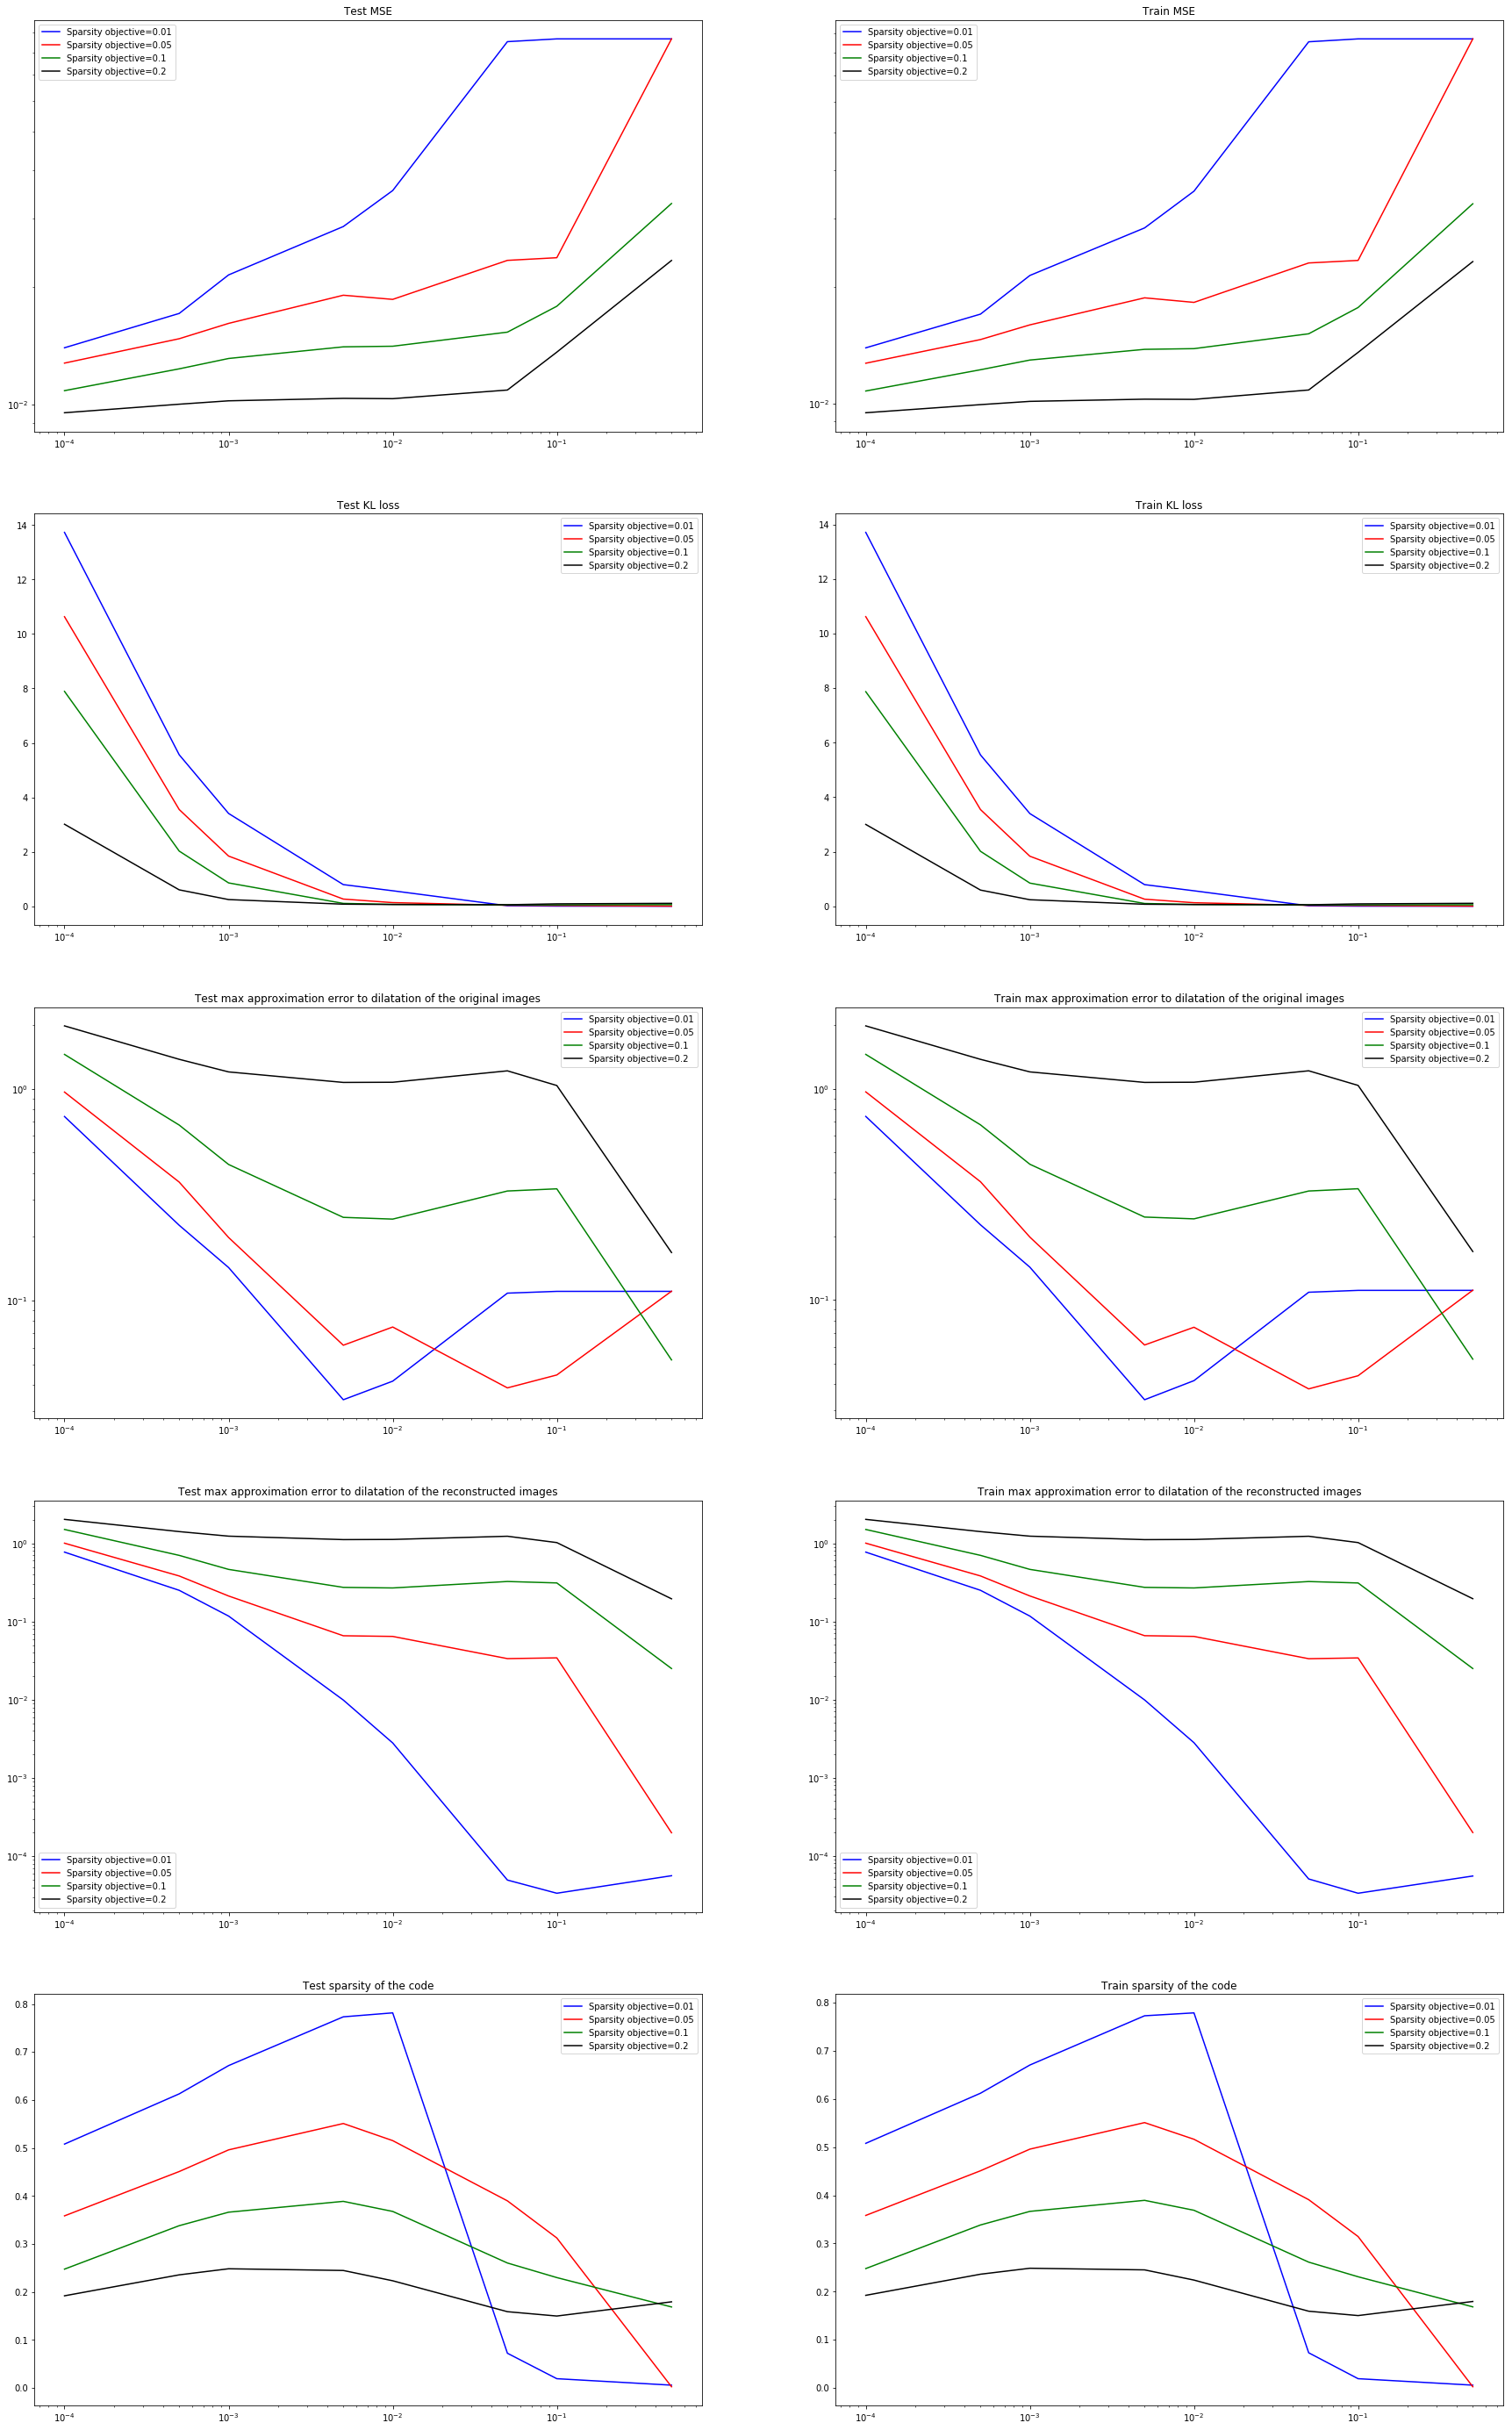

In [12]:
plt.figure(figsize=(30,50))

ax = plt.subplot(5, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, test_mse[:,1], 'r')
ax.plot(sparsity_weights, test_mse[:,2], 'g')
ax.plot(sparsity_weights, test_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test MSE')

ax = plt.subplot(5, 2, 2)
ax.plot(sparsity_weights, train_mse[:,0], 'b')
ax.plot(sparsity_weights, train_mse[:,1], 'r')
ax.plot(sparsity_weights, train_mse[:,2], 'g')
ax.plot(sparsity_weights, train_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train MSE')

ax = plt.subplot(5, 2, 3)
ax.plot(sparsity_weights, test_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, test_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, test_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, test_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test KL loss')


ax = plt.subplot(5, 2, 4)
ax.plot(sparsity_weights, train_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, train_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, train_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train KL loss')

ax = plt.subplot(5, 2, 5)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 6)
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 7)
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the reconstructed images')

ax = plt.subplot(5, 2, 8)
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the reconstructed images')


ax = plt.subplot(5, 2, 9)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, test_sparsity[:,1], 'r')
ax.plot(sparsity_weights, test_sparsity[:,2], 'g')
ax.plot(sparsity_weights, test_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test sparsity of the code')


ax = plt.subplot(5, 2, 10)
ax.plot(sparsity_weights, train_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,1], 'r')
ax.plot(sparsity_weights, train_sparsity[:,2], 'g')
ax.plot(sparsity_weights, train_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train sparsity of the code')

plt.show()

# 1. Sparsity_Objective = 0.01

## 1.1 Sparsity_weight = 0.0001 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.013995093196630478


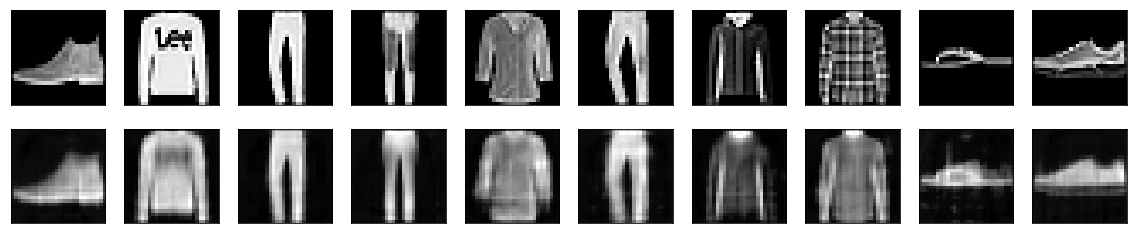

Histograms of the encodings - Sparsity (Hoyer):  0.5081442594528198


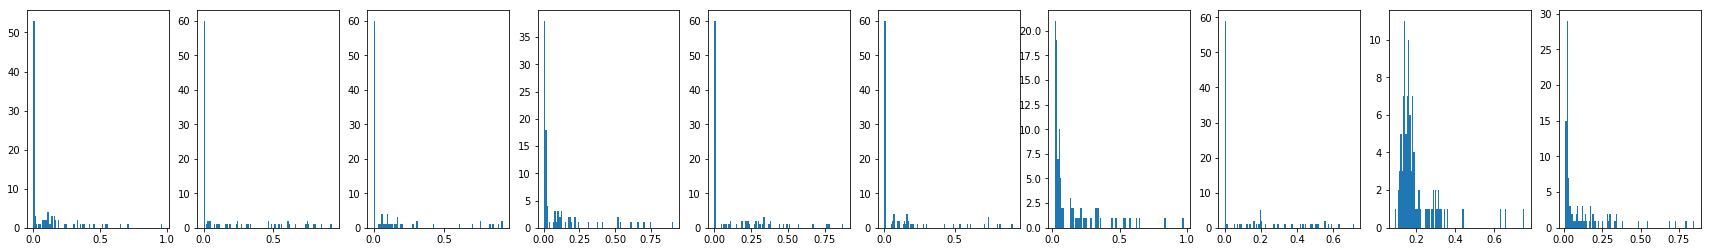

Atom images of the decoder


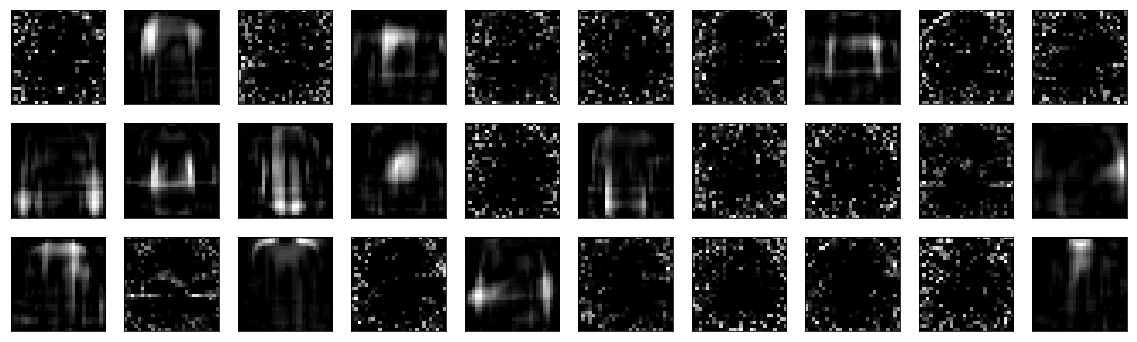

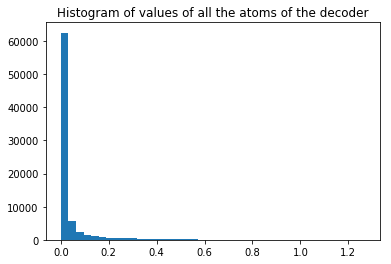

In [23]:
i = np.arange(8)[sparsity_weights==0.0001][0]
j = np.arange(4)[sparsity_objectives==0.01][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_AsymDecay.load('18_08_16_dim100_KLdivSum_0.0001_0.01_AsymDecay_0_1_1.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


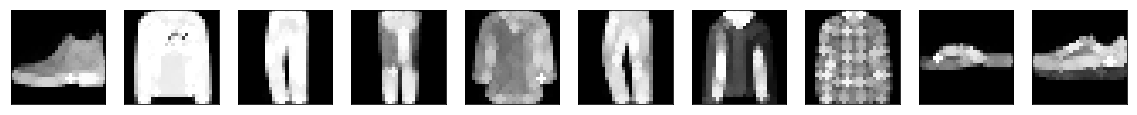

Dilatation of the reconstructions


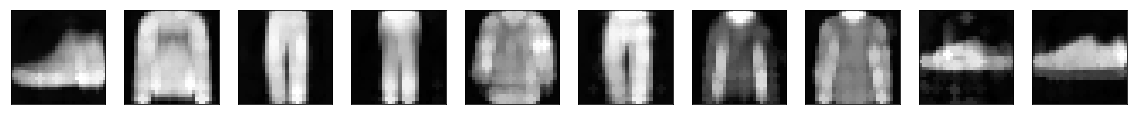

Original images and max-approximation to dilatation
Max-approx error to original:  0.7403280430793763  - Max-approx error to reconstruction:  0.7731614334106446


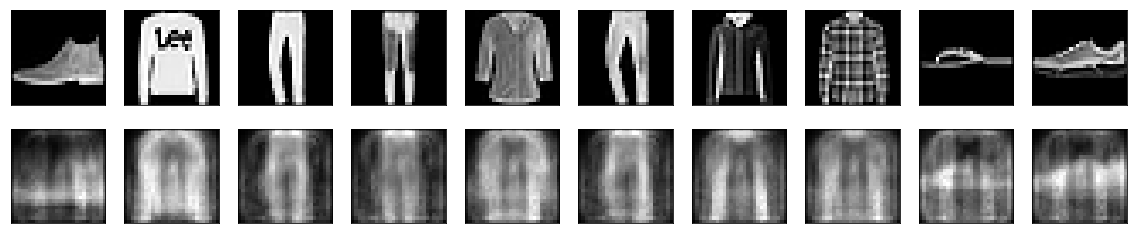

Dilated of the atom images of the decoder


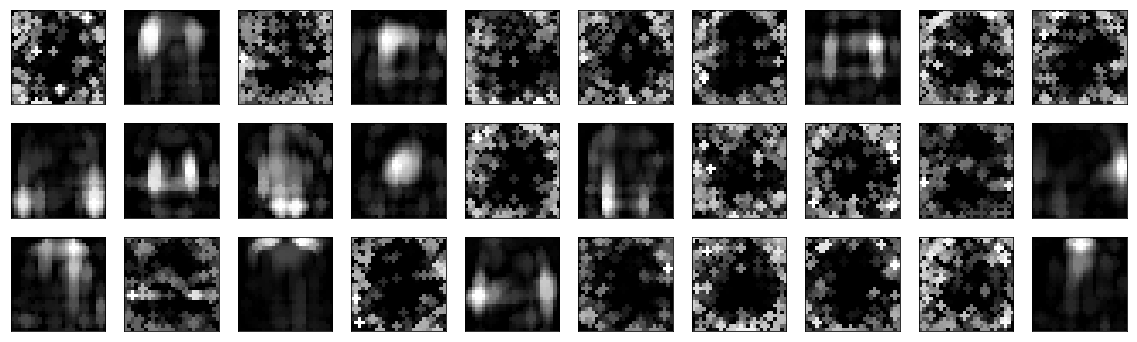

In [24]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.2 Sparsity_weight = 0.0005 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.01713855088055134


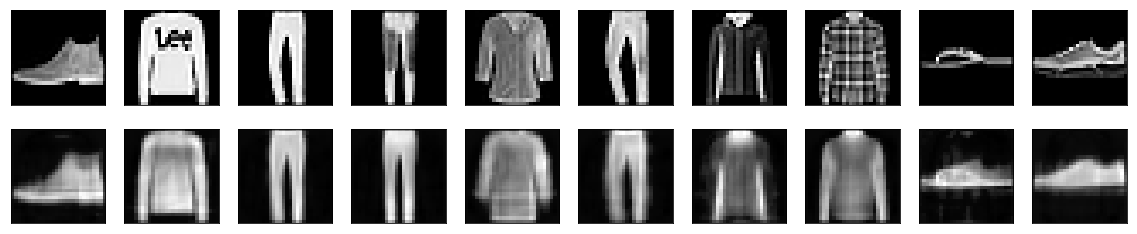

Histograms of the encodings - Sparsity (Hoyer):  0.6127894520759583


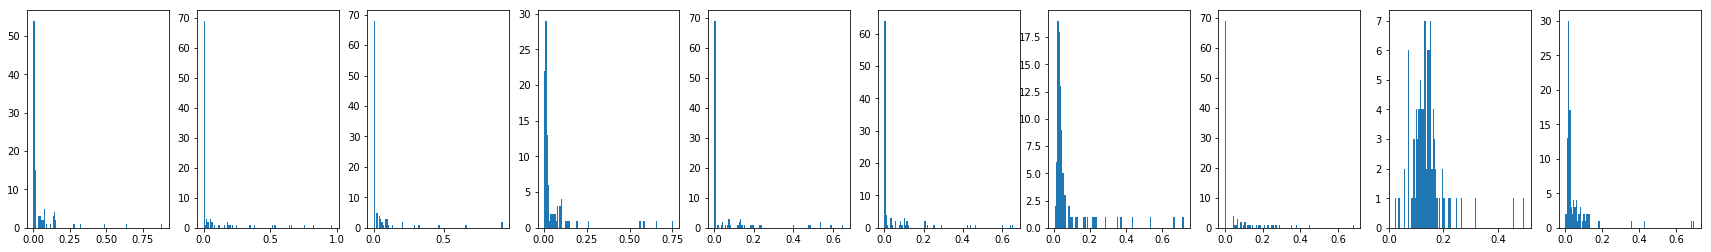

Atom images of the decoder


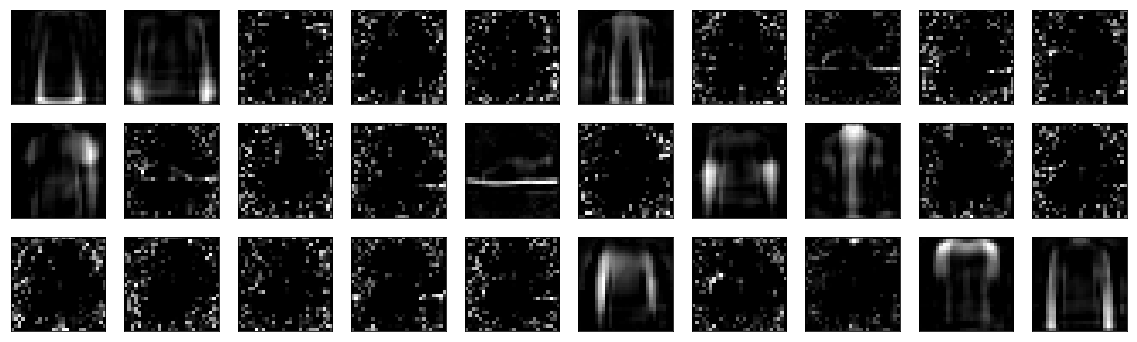

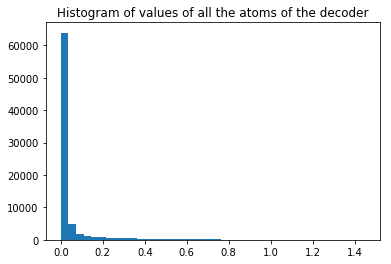

In [31]:
sp_o = 0.01
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_AsymDecay.load('18_08_16_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_AsymDecay_0_1_1.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


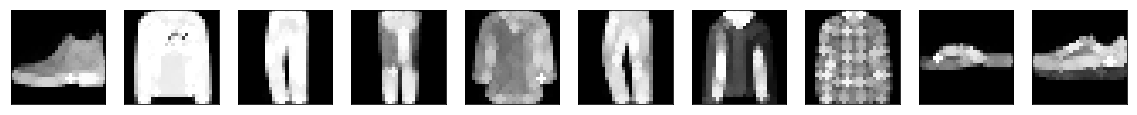

Dilatation of the reconstructions


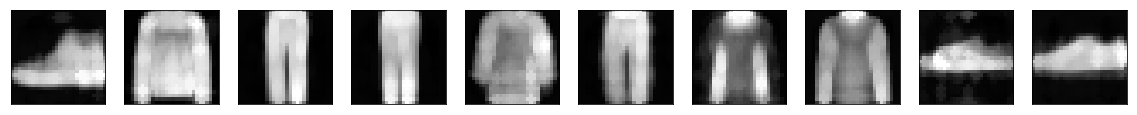

Original images and max-approximation to dilatation
Max-approx error to original:  0.22692389025688173  - Max-approx error to reconstruction:  0.2509704627275467


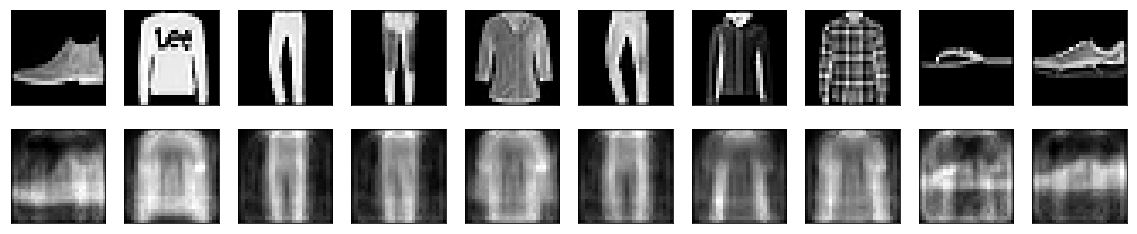

Dilated of the atom images of the decoder


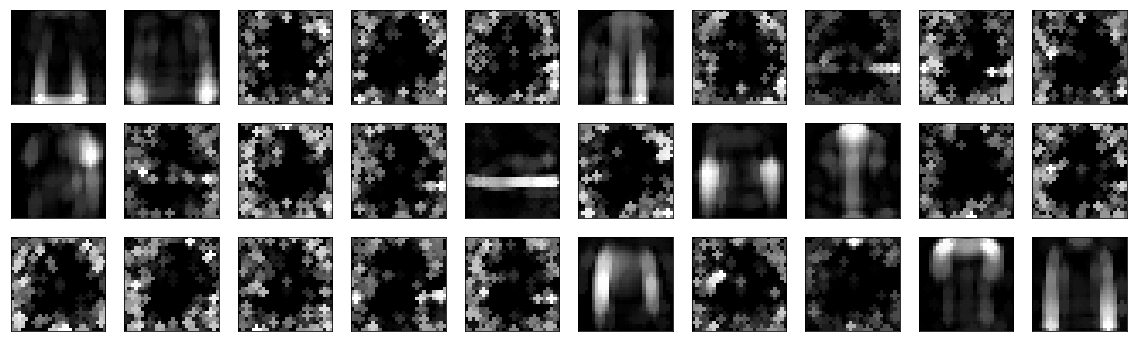

In [32]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.3 Sparsity_weight = 0.001 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.02151489872932434


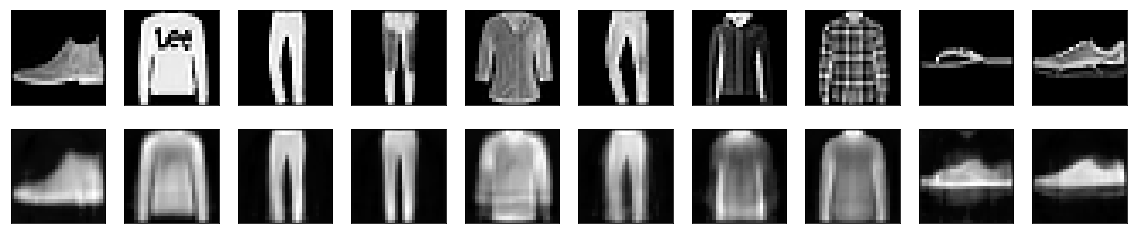

Histograms of the encodings - Sparsity (Hoyer):  0.671704113483429


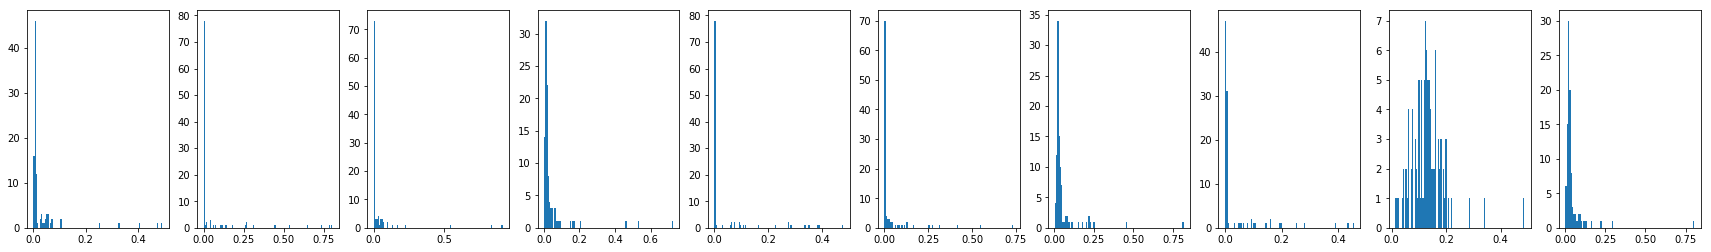

Atom images of the decoder


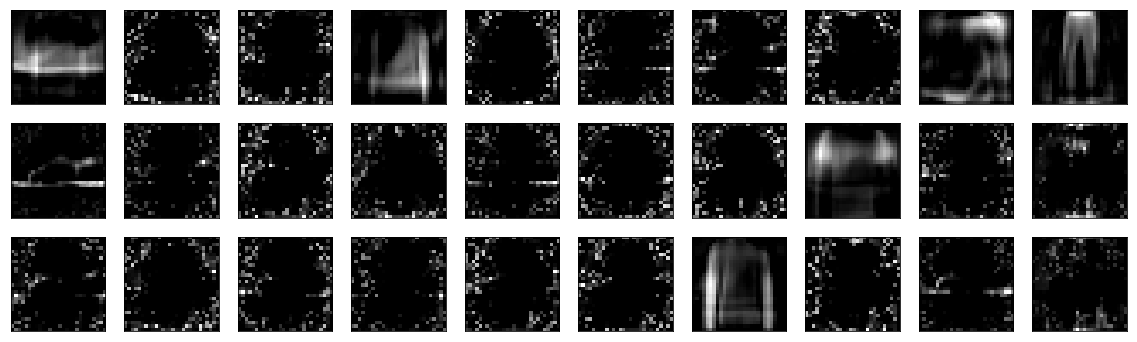

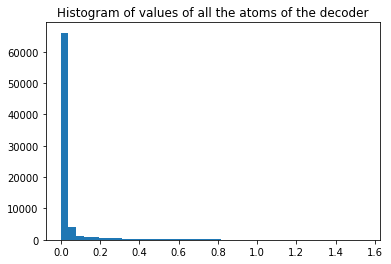

In [33]:
sp_o = 0.01
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_AsymDecay.load('18_08_16_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_AsymDecay_0_1_1.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


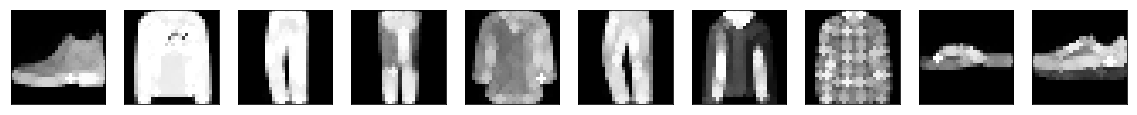

Dilatation of the reconstructions


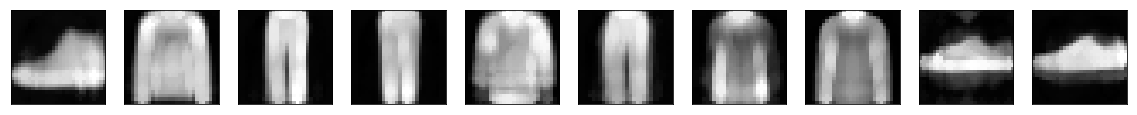

Original images and max-approximation to dilatation
Max-approx error to original:  0.14331247582435608  - Max-approx error to reconstruction:  0.11754944947957993


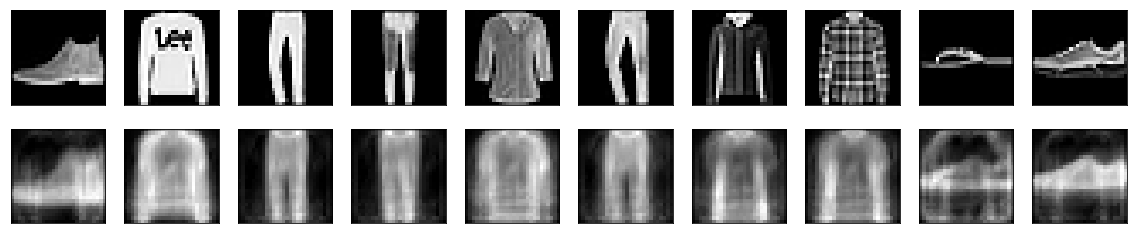

Dilated of the atom images of the decoder


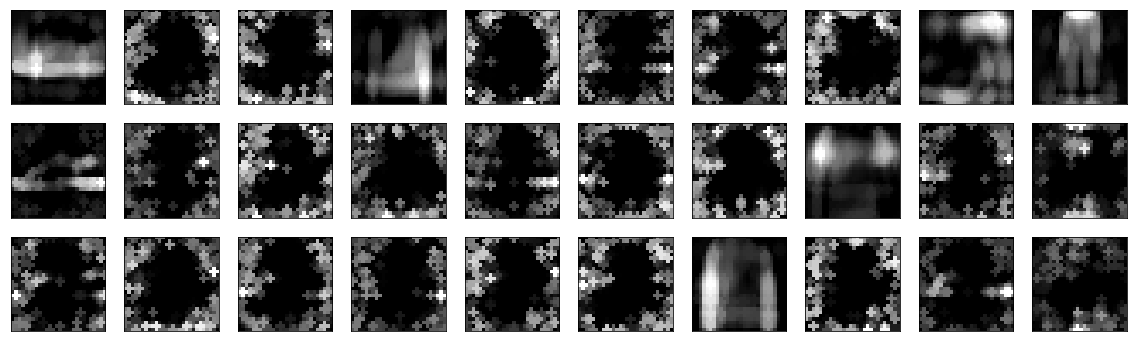

In [34]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.4 Sparsity_weight = 0.005 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.02862234137058258


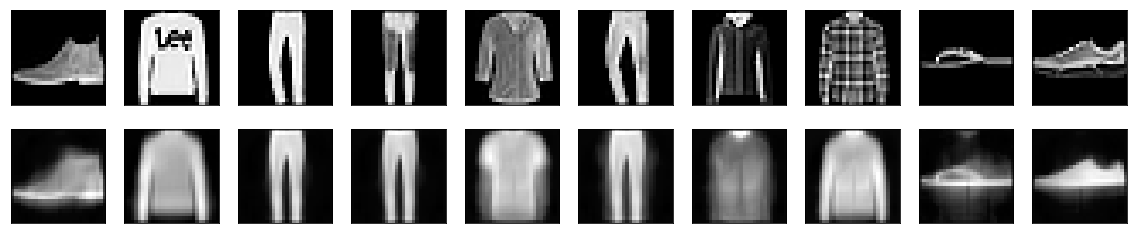

Histograms of the encodings - Sparsity (Hoyer):  0.7733177542686462


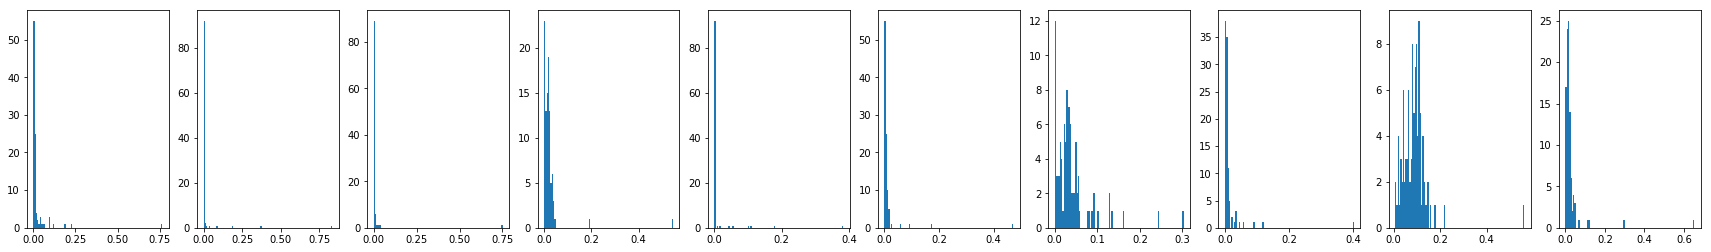

Atom images of the decoder


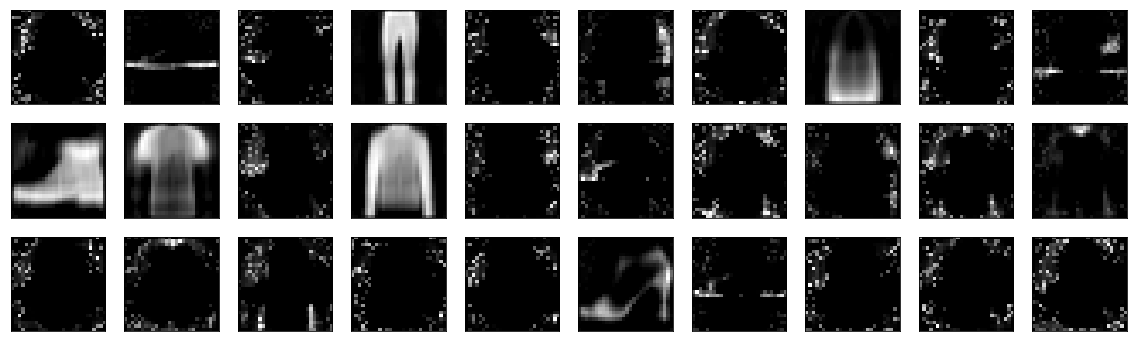

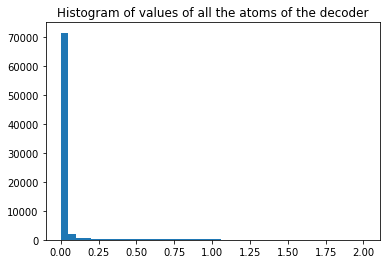

In [35]:
sp_o = 0.01
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_AsymDecay.load('18_08_16_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_AsymDecay_0_1_1.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


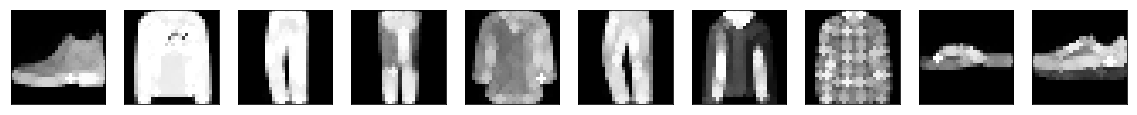

Dilatation of the reconstructions


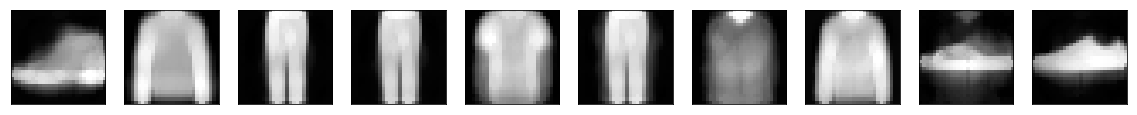

Original images and max-approximation to dilatation
Max-approx error to original:  0.03404751800298691  - Max-approx error to reconstruction:  0.009919662348926068


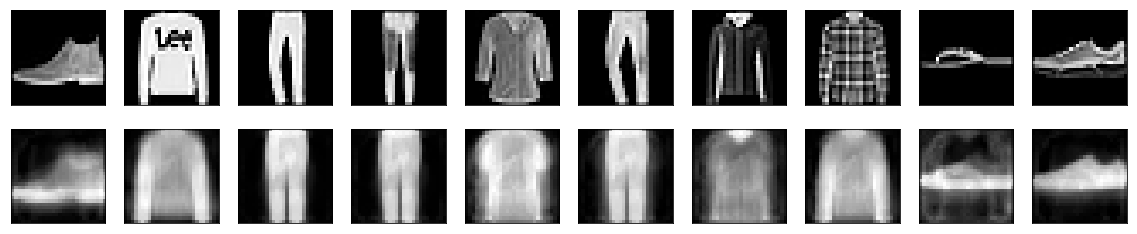

Dilated of the atom images of the decoder


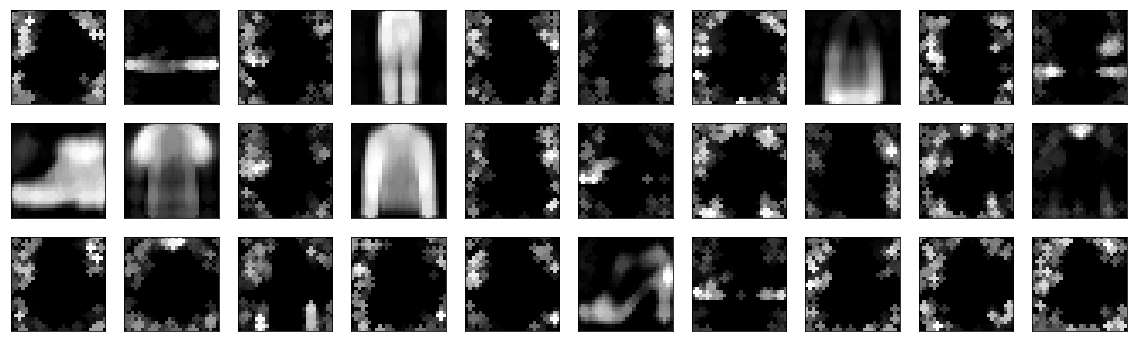

In [36]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.5 Sparsity_weight = 0.01 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.035398708885908126


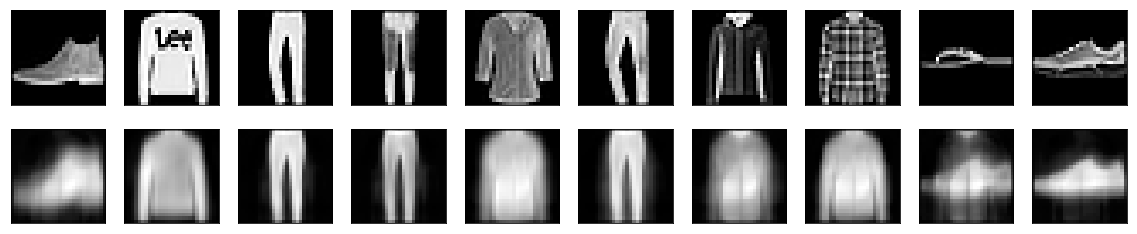

Histograms of the encodings - Sparsity (Hoyer):  0.7815545797348022


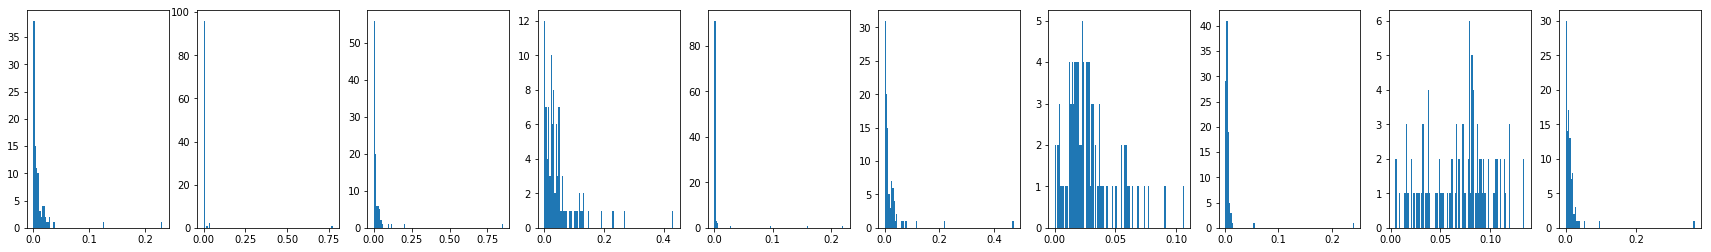

Atom images of the decoder


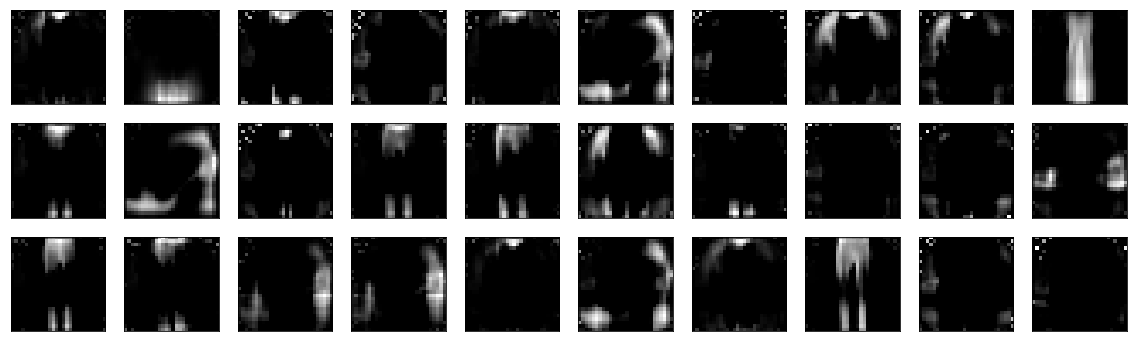

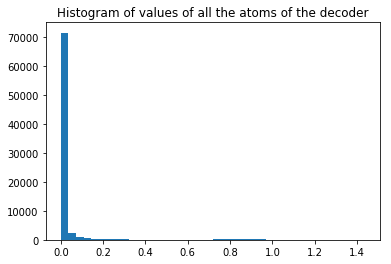

In [50]:
sp_o = 0.01
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_AsymDecay.load('18_08_16_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_AsymDecay_0_1_1.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


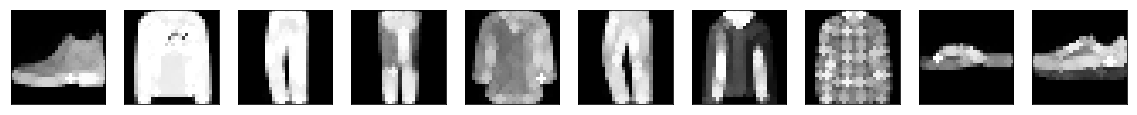

Dilatation of the reconstructions


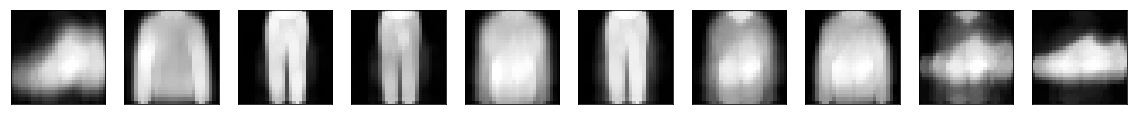

Original images and max-approximation to dilatation
Max-approx error to original:  0.04167037510275841  - Max-approx error to reconstruction:  0.0028038784727454184


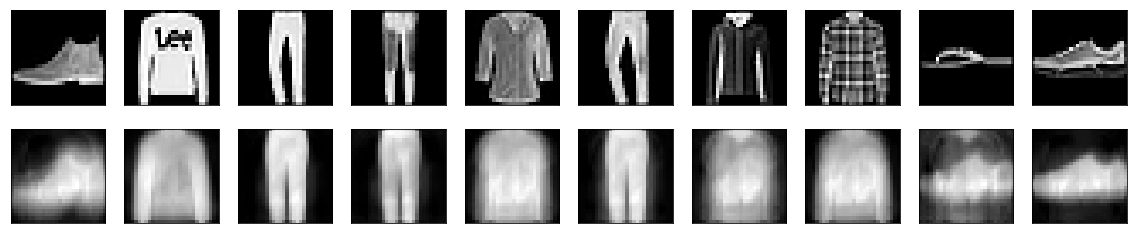

Dilated of the atom images of the decoder


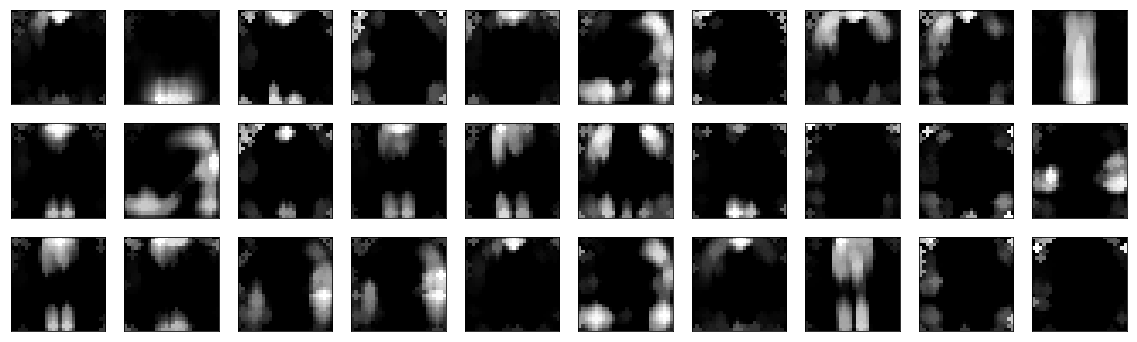

In [51]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.6 Sparsity_weight = 0.05 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.08523666661977768


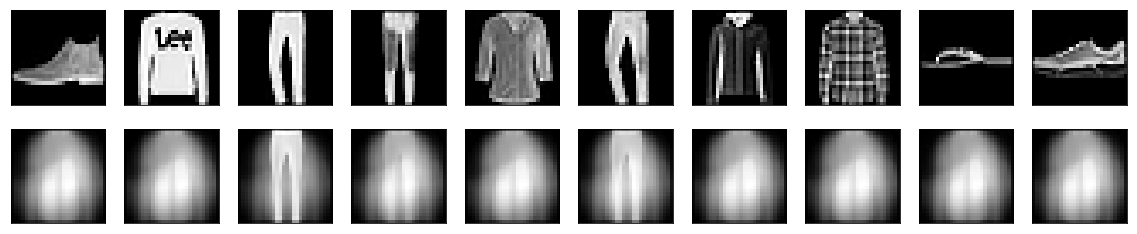

Histograms of the encodings - Sparsity (Hoyer):  0.07233566790819168


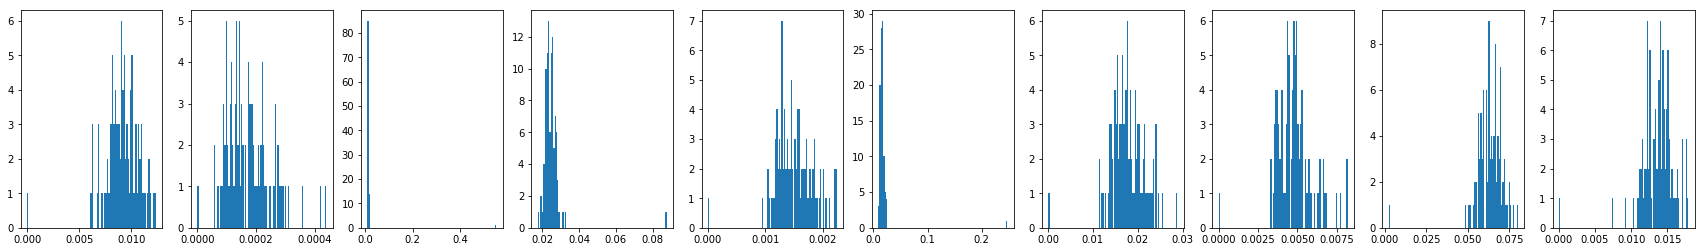

Atom images of the decoder


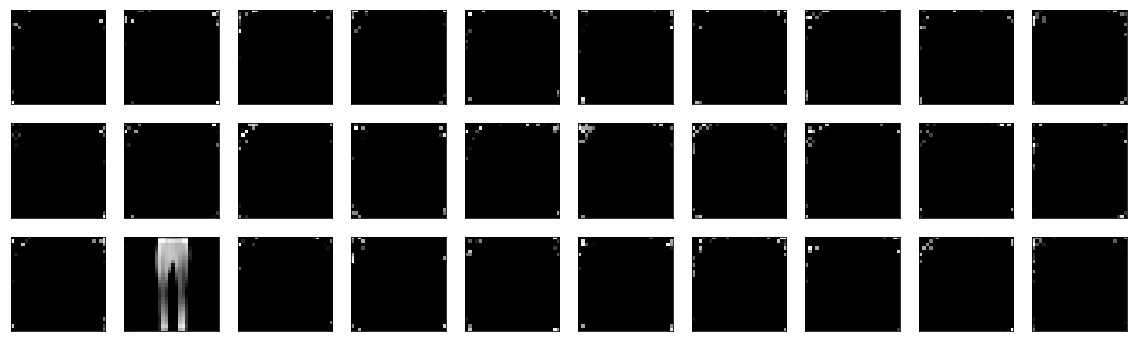

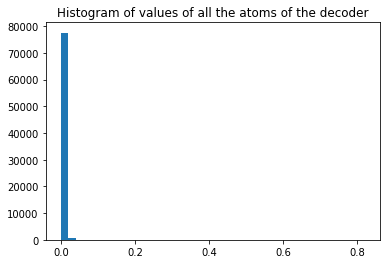

In [21]:
sp_o = 0.01
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_AsymDecay.load('18_08_17_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_AsymDecay_0_1_1.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


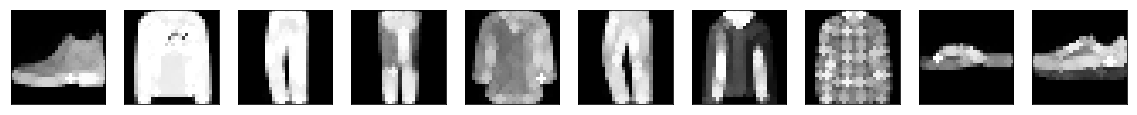

Dilatation of the reconstructions


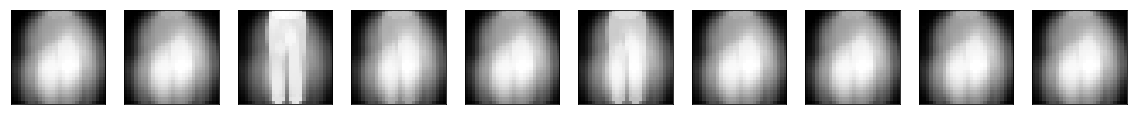

Original images and max-approximation to dilatation
Max-approx error to original:  0.10849664044380188  - Max-approx error to reconstruction:  4.946154911303893e-05


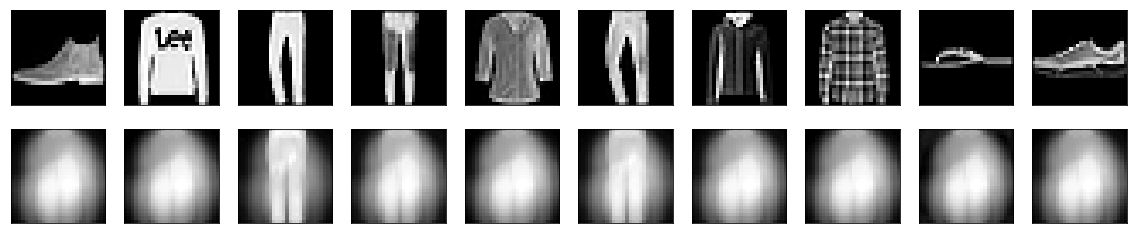

Dilated of the atom images of the decoder


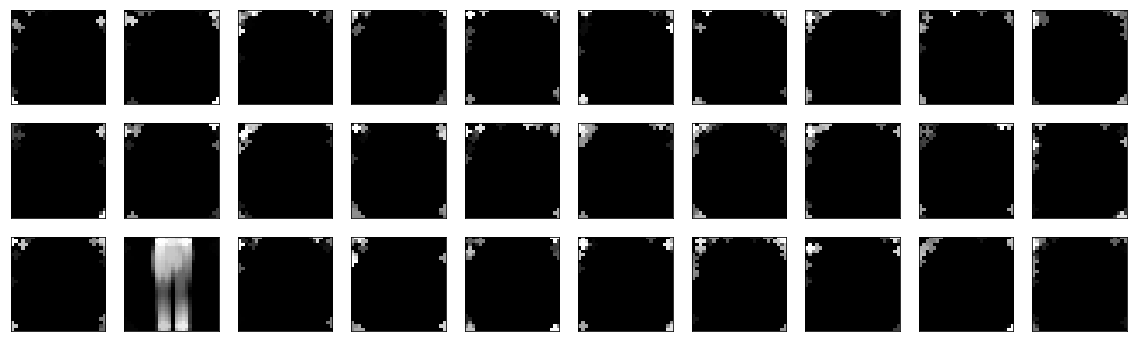

In [22]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.7 Sparsity_weight = 0.1 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.08664310859441757


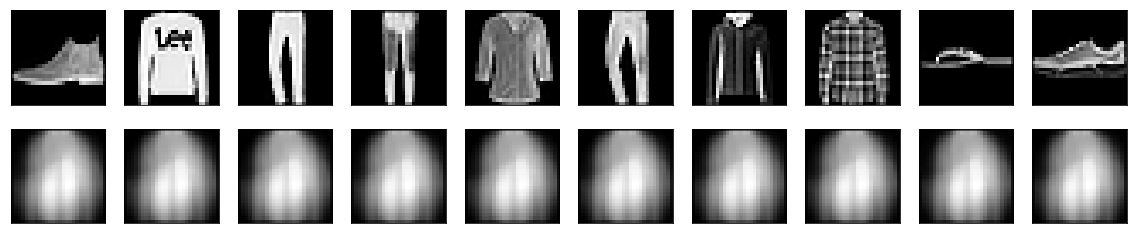

Histograms of the encodings - Sparsity (Hoyer):  0.019295528531074524


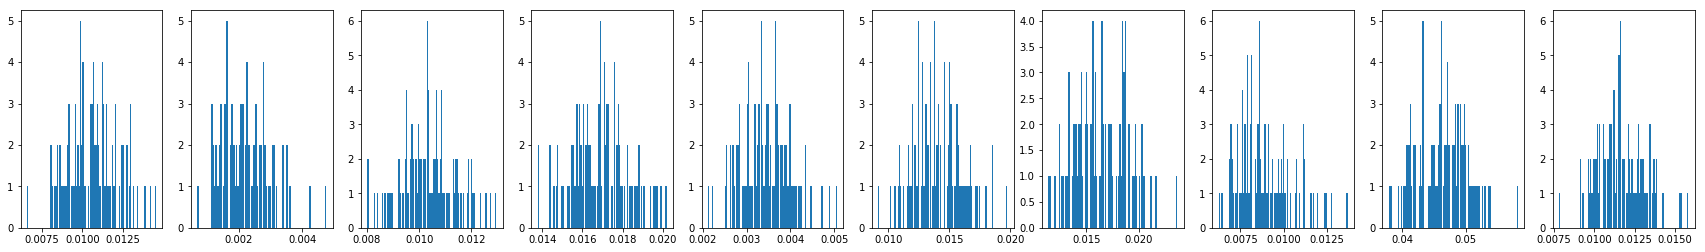

Atom images of the decoder


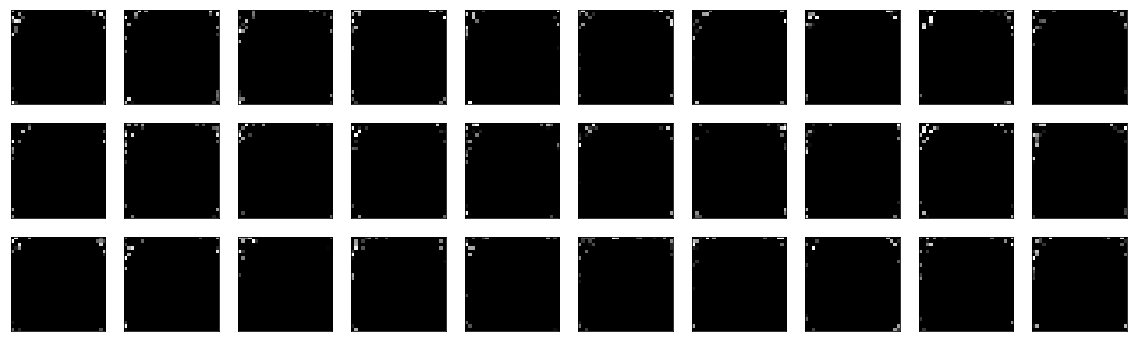

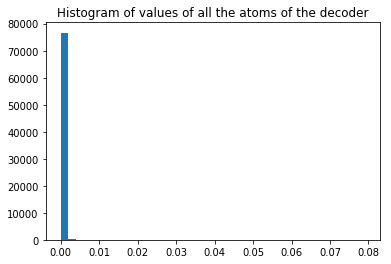

In [25]:
sp_o = 0.01
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_AsymDecay.load('18_08_17_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_AsymDecay_0_1_1.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


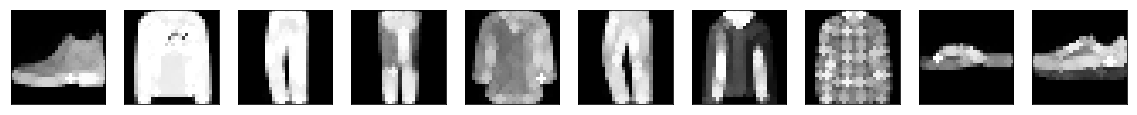

Dilatation of the reconstructions


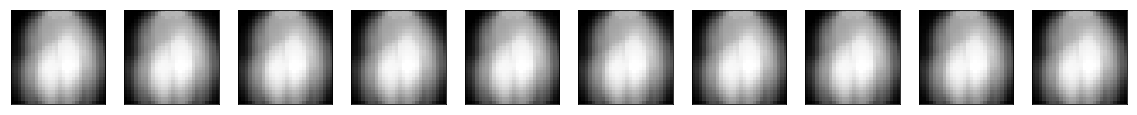

Original images and max-approximation to dilatation
Max-approx error to original:  0.11062201737165452  - Max-approx error to reconstruction:  3.355472351540811e-05


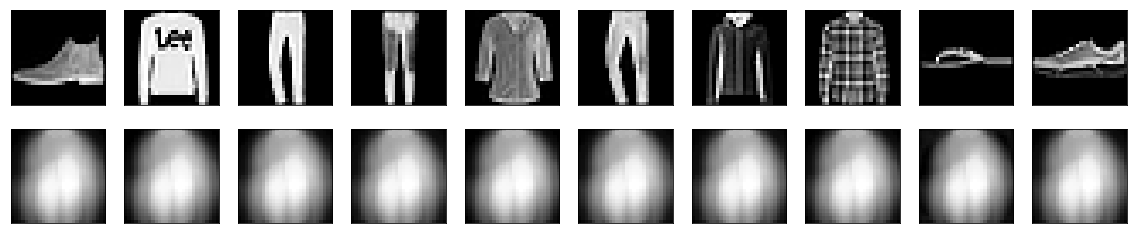

Dilated of the atom images of the decoder


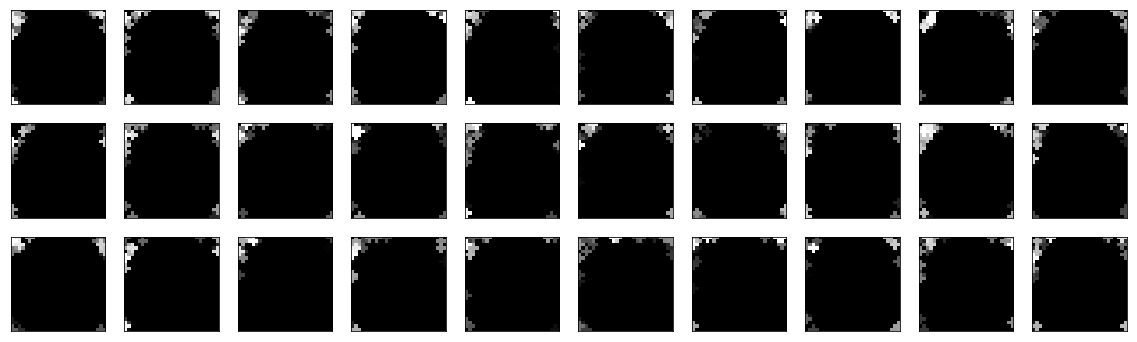

In [26]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.8 Sparsity_weight = 0.5 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.08664310859441757


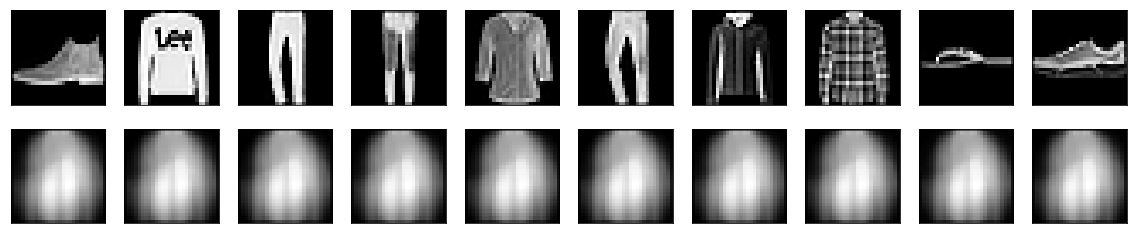

Histograms of the encodings - Sparsity (Hoyer):  0.019295528531074524


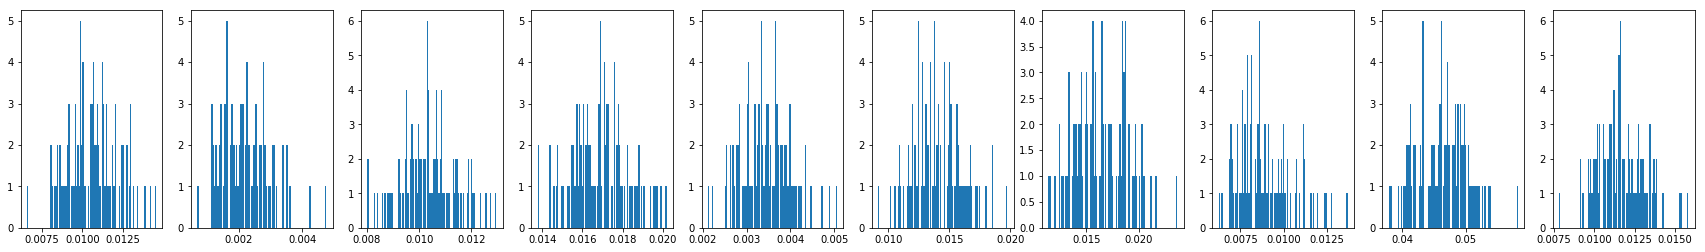

Atom images of the decoder


In [ ]:
sp_o = 0.01
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_AsymDecay.load('18_08_17_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_AsymDecay_0_1_1.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

In [ ]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)